In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [45]:
os.chdir('E:\Projects\Temperature prediction')

In [46]:
series = pd.read_excel('Raw data.xlsx', header = 0, index_col = 0)

In [47]:
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Figure size 1440x720 with 0 Axes>

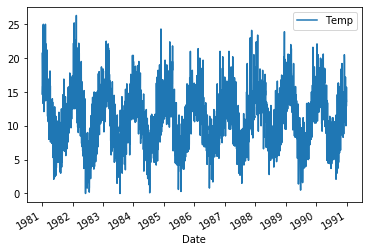

<Figure size 1440x720 with 0 Axes>

In [48]:
series.plot()
plt.figure(figsize = (20,10))

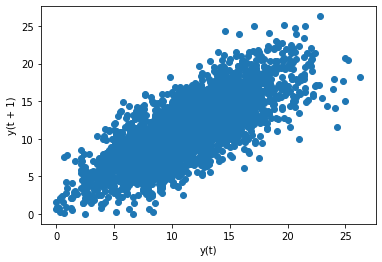

In [49]:
# Checking for autocorrelation with lag plot
pd.plotting.lag_plot(series, lag = 1)

In [50]:
# Calculating correlation coefficient with lagged observations
df = pd.read_excel('Raw data.xlsx')
df['Temp - 1'] = df['Temp'].shift()
df.corr()

,Temp,Temp - 1
Temp,1.000000,0.774876
Temp - 1,0.774876,1.000000


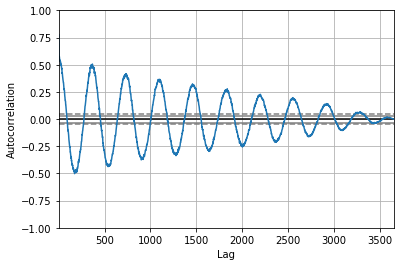

In [51]:
# Checking autocorrelation with multiple lags with plots
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

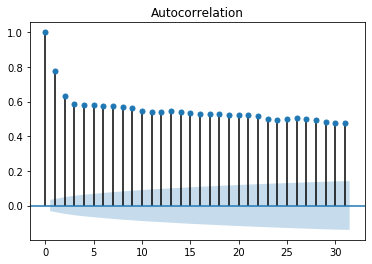

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags = 31)
plt.show()

Persistance model MSE:  3.4228571428571413


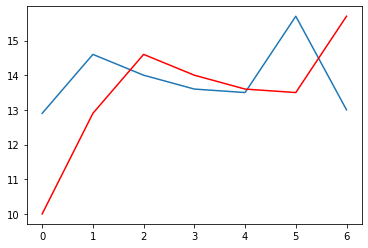

In [85]:
# Persistance model for baseline performance
from sklearn.metrics import mean_squared_error

df = pd.read_excel('Raw data.xlsx', index_col = 0, parse_dates = True)
df['Temp - 1'] = df['Temp'].shift()

df = df[['Temp - 1','Temp']]

train, test = df[1:len(df)-7], df[len(df)-7:]

train_X, train_y = train.iloc[:,0], train.iloc[:,1]
test_X, test_y = test.iloc[:,0], test.iloc[:,1]

def model_persistance(x):
    return x

predictions = list()

for x in test_X:
    yhat = model_persistance(x)
    predictions.append(yhat)
    
print('Persistance model MSE: ', mean_squared_error(test_y, predictions))
plt.plot(test_y.values)
plt.plot(predictions, color = 'red')
plt.show()

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


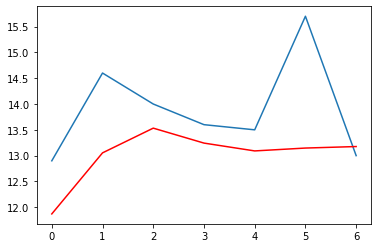

In [89]:
# Building an AutoRegression model

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = pd.read_excel('Raw data.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()